In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor


In [71]:
data = pd.read_csv("sickness_table.csv")

In [72]:
data.head(10)

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0
5,5,2016-04-06,70,6492.0,1700,90,0.0,0.0
6,6,2016-04-07,64,6204.0,1700,90,0.0,0.0
7,7,2016-04-08,62,7614.0,1700,90,0.0,0.0
8,8,2016-04-09,51,5706.0,1700,90,0.0,0.0
9,9,2016-04-10,54,6606.0,1700,90,0.0,0.0


Removing Unwanted Columns

In [73]:
# 1.1 Remove Redundant Columns
# Drop the 'Unnamed: 0' column (if it exists)
if 'Unnamed: 0' in data.columns:
    sickness_data = data.drop(columns=['Unnamed: 0'])

In [74]:
# Convert the 'date' column to datetime format
sickness_data['date'] = pd.to_datetime(sickness_data['date'])

In [75]:
sickness_data.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [76]:
sickness_data.shape

(1152, 7)

In [77]:
sickness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   float64       
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   float64       
 6   dafted    1152 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 63.1 KB


In [78]:
sickness_data.describe()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
count,1152,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,1152.000000
mean,2017-10-28 12:00:00,68.808160,7919.531250,1820.572917,90.0,34.718750,16.335938
min,2016-04-01 00:00:00,36.000000,4074.000000,1700.000000,90.0,0.000000,0.000000
25%,2017-01-13 18:00:00,58.000000,6978.000000,1800.000000,90.0,0.000000,0.000000
50%,2017-10-28 12:00:00,68.000000,7932.000000,1800.000000,90.0,0.000000,0.000000
75%,2018-08-12 06:00:00,78.000000,8827.500000,1900.000000,90.0,12.250000,0.000000
max,2019-05-27 00:00:00,119.000000,11850.000000,1900.000000,90.0,555.000000,465.000000
std,NaN,14.293942,1290.063571,80.086953,0.0,79.694251,53.394089


In [79]:
sickness_data.isnull().sum()

date        0
n_sick      0
calls       0
n_duty      0
n_sby       0
sby_need    0
dafted      0
dtype: int64

Data Exploration

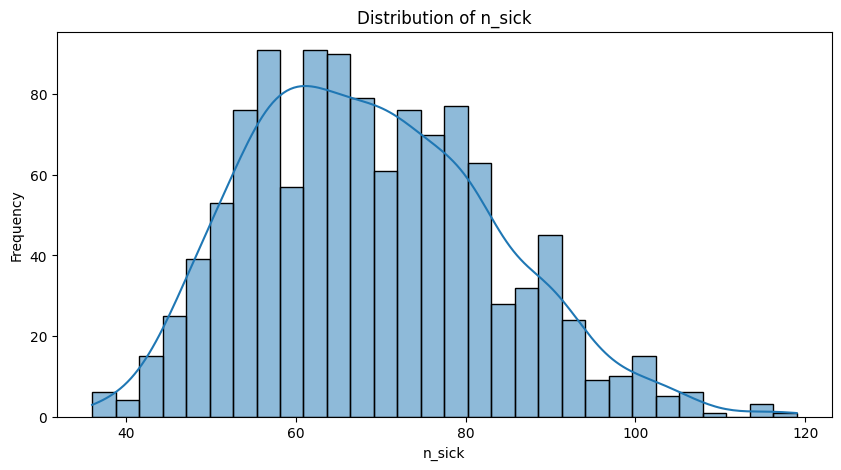

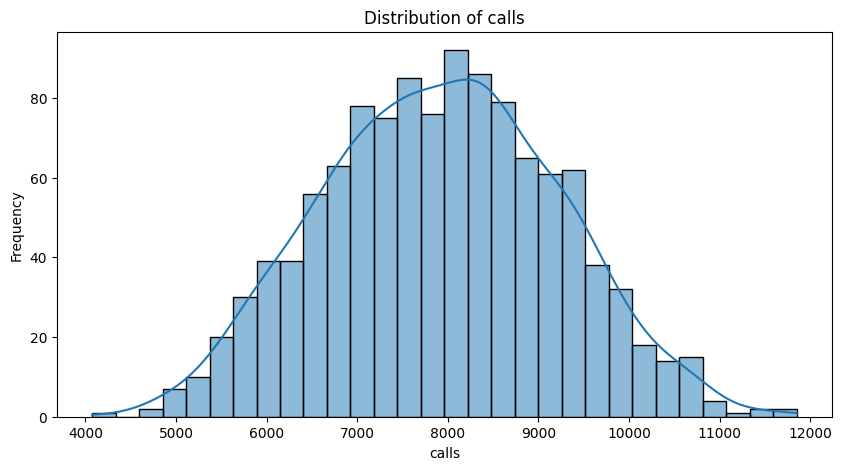

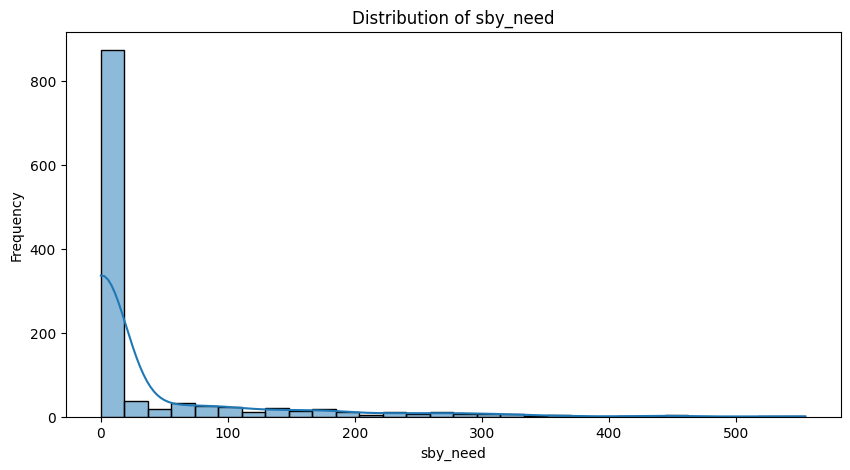

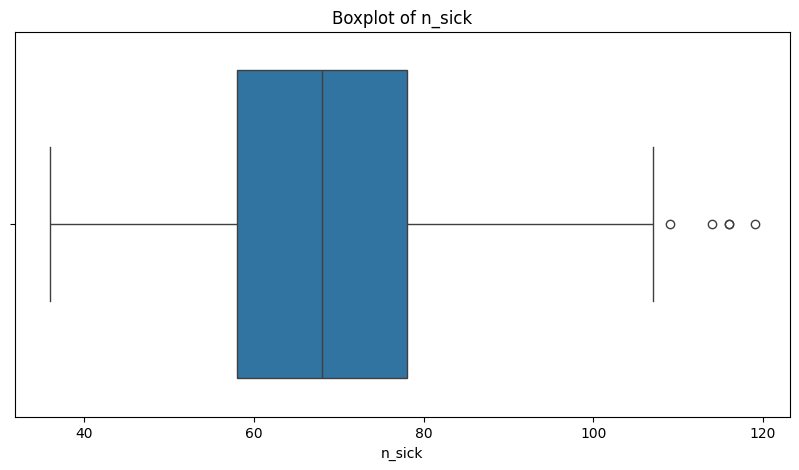

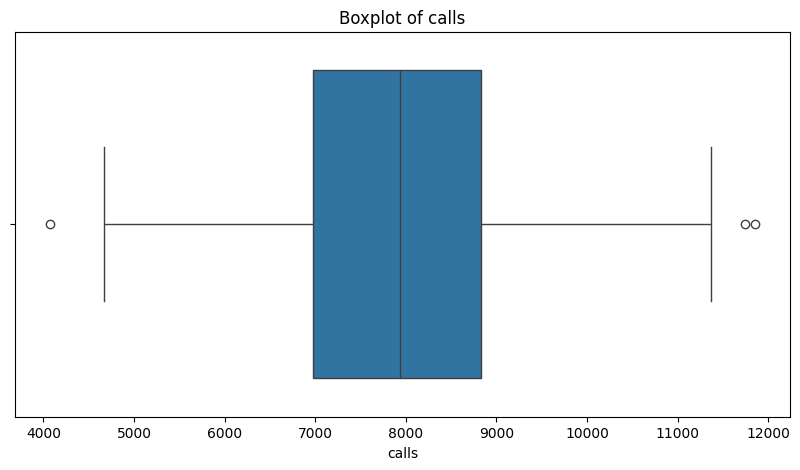

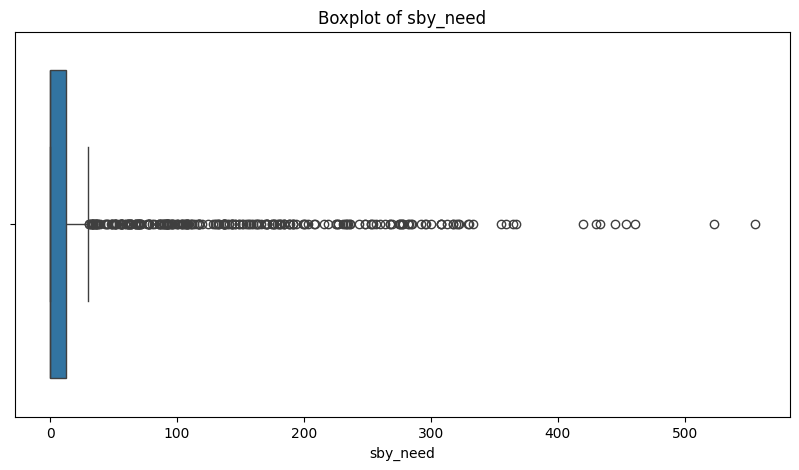

                mean     50%          std
n_sick      68.80816    68.0    14.293942
calls     7919.53125  7932.0  1290.063571
sby_need    34.71875     0.0    79.694251
Number of outliers detected in n_sick: 5
Number of outliers detected in calls: 3
Number of outliers detected in sby_need: 256


In [80]:
# Columns of interest
columns_to_analyze = ['n_sick', 'calls', 'sby_need']

# Histograms for Distribution Analysis
for column in columns_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.histplot(sickness_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for Outlier Analysis
for column in columns_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sickness_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# Summary Statistics
summary_stats = sickness_data[columns_to_analyze].describe().T[['mean', '50%', 'std']]
print(summary_stats)

# IQR for Outlier Detection
for column in columns_to_analyze:
    Q1 = sickness_data[column].quantile(0.25)
    Q3 = sickness_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = sickness_data[(sickness_data[column] < lower_bound) | (sickness_data[column] > upper_bound)]
    print(f"Number of outliers detected in {column}: {len(outliers)}")

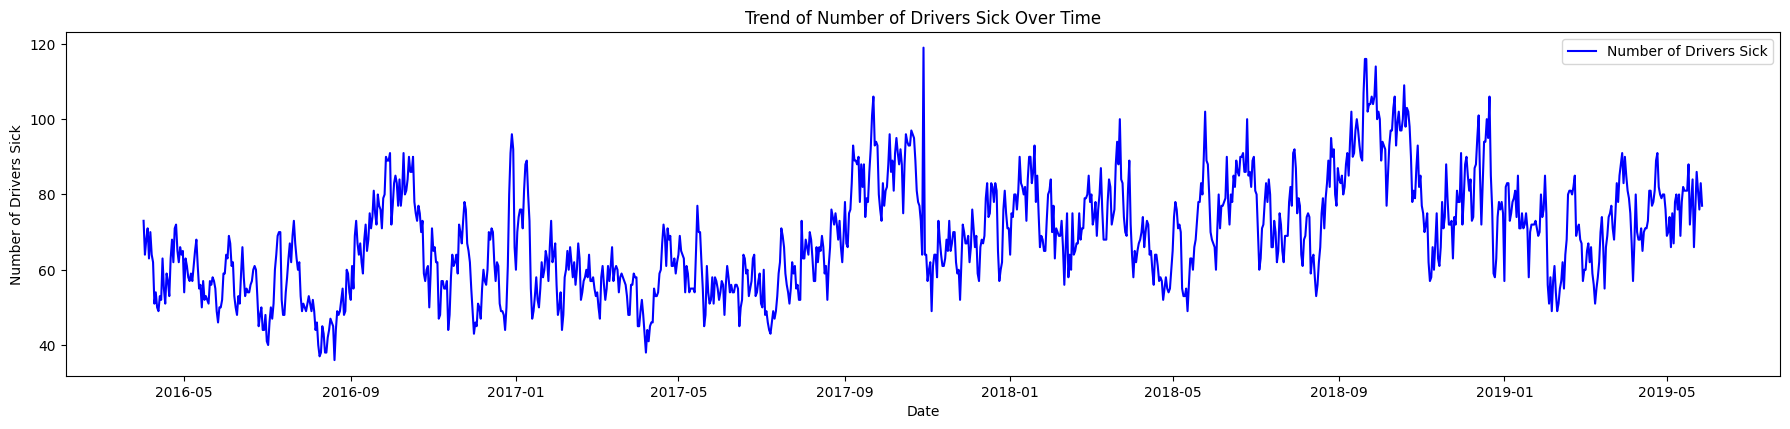

In [81]:
# Time Series Analysis
plt.figure(figsize=(18, 12))

# Plotting n_sick over time
plt.subplot(3, 1, 1)
plt.plot(sickness_data['date'], sickness_data['n_sick'], label='Number of Drivers Sick', color='blue')
plt.title('Trend of Number of Drivers Sick Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Drivers Sick')
plt.legend()

plt.tight_layout()
plt.show()

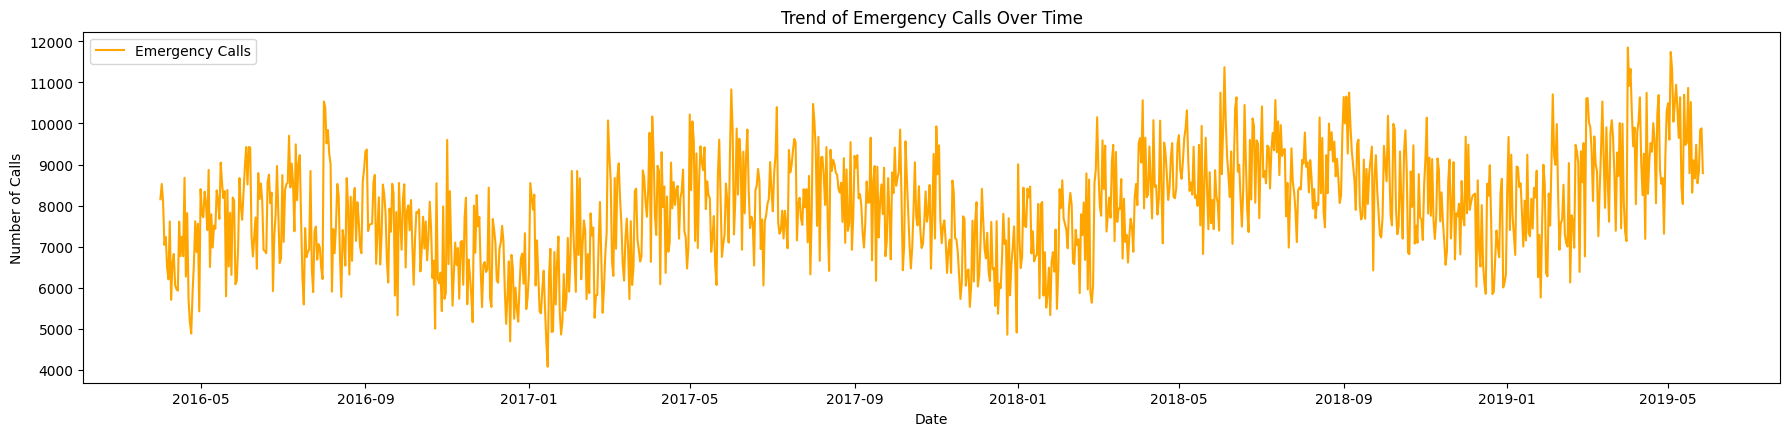

In [82]:
# Time Series Analysis
plt.figure(figsize=(18, 12))

# Plotting calls over time
plt.subplot(3, 1, 2)
plt.plot(sickness_data['date'], sickness_data['calls'], label='Emergency Calls', color='orange')
plt.title('Trend of Emergency Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()

plt.tight_layout()
plt.show()


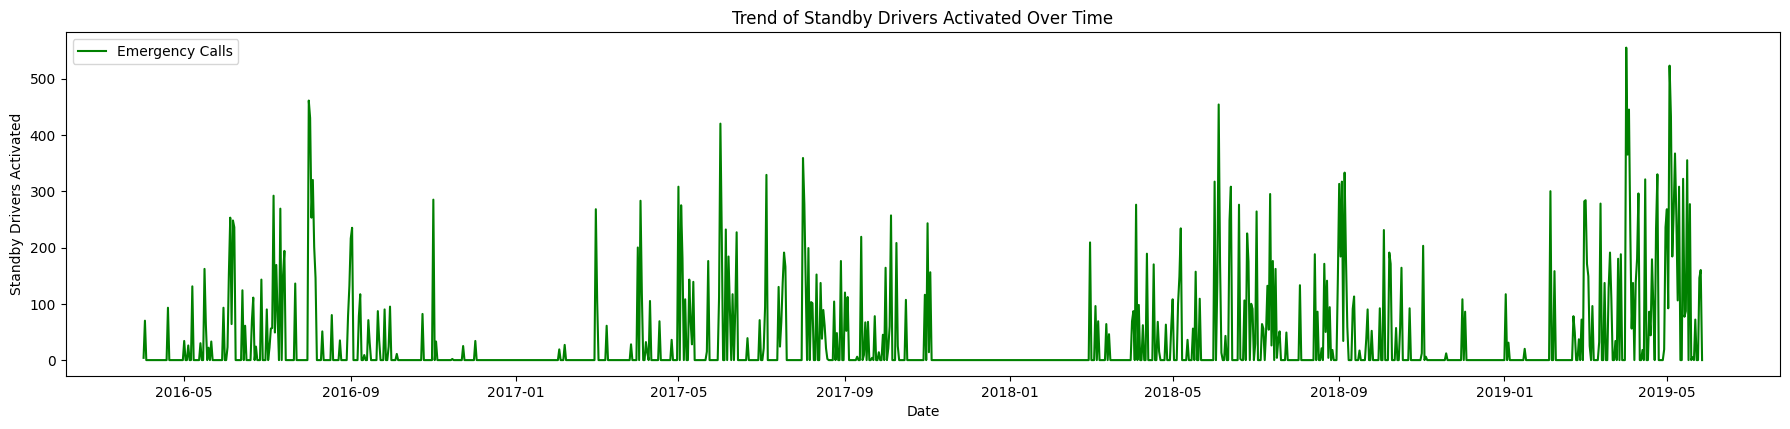

In [83]:
# Time Series Analysis
plt.figure(figsize=(18, 12))

# Plotting standby drivers activated
plt.subplot(3, 1, 1)
plt.plot(sickness_data['date'], sickness_data['sby_need'], label='Emergency Calls', color='green')
plt.title('Trend of Standby Drivers Activated Over Time')
plt.xlabel('Date')
plt.ylabel('Standby Drivers Activated')
plt.legend()

plt.tight_layout()
plt.show()


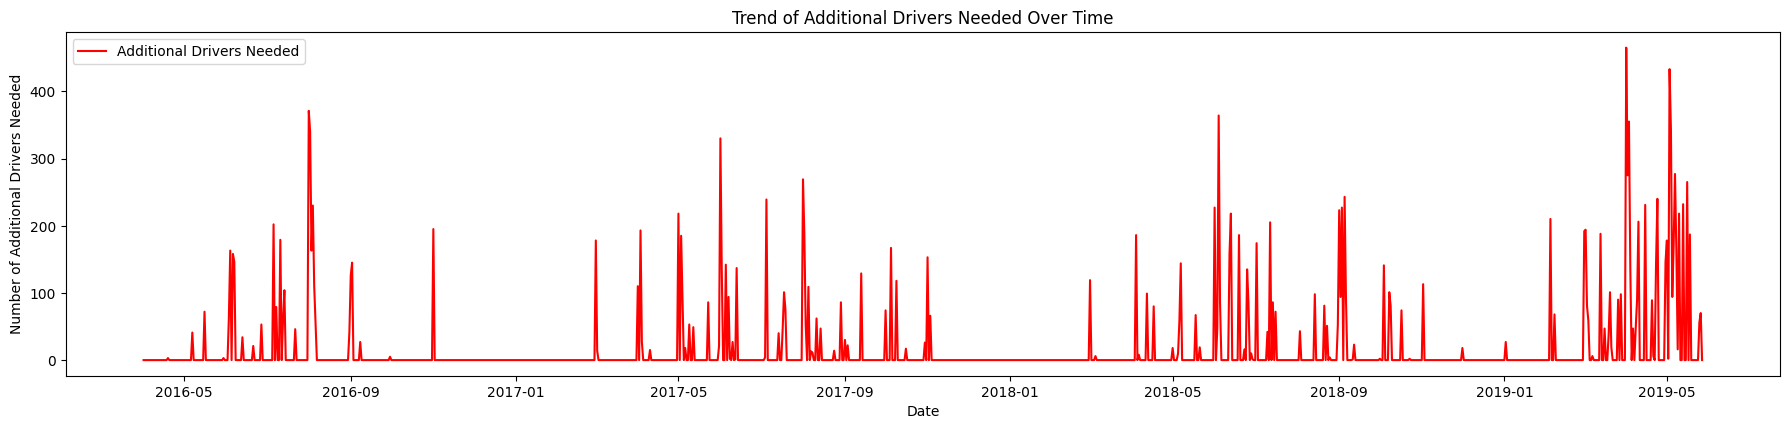

In [84]:
# Time Series Analysis
plt.figure(figsize=(18, 12))

# Plotting dafted over time
plt.subplot(3, 1, 1)
plt.plot(sickness_data['date'], sickness_data['dafted'], label='Additional Drivers Needed', color='red')
plt.title('Trend of Additional Drivers Needed Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Additional Drivers Needed')
plt.legend()

plt.tight_layout()
plt.show()


In [85]:
sickness_data.corr()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,1.000000,0.495959,0.385679,0.927437,NaN,0.137543,0.131938
n_sick,0.495959,1.000000,0.155371,0.459501,NaN,0.022321,0.016800
calls,0.385679,0.155371,1.000000,0.364135,NaN,0.677468,0.557340
n_duty,0.927437,0.459501,0.364135,1.000000,NaN,0.090654,0.084955
n_sby,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sby_need,0.137543,0.022321,0.677468,0.090654,NaN,1.000000,0.945168
dafted,0.131938,0.016800,0.557340,0.084955,NaN,0.945168,1.000000


<Axes: >

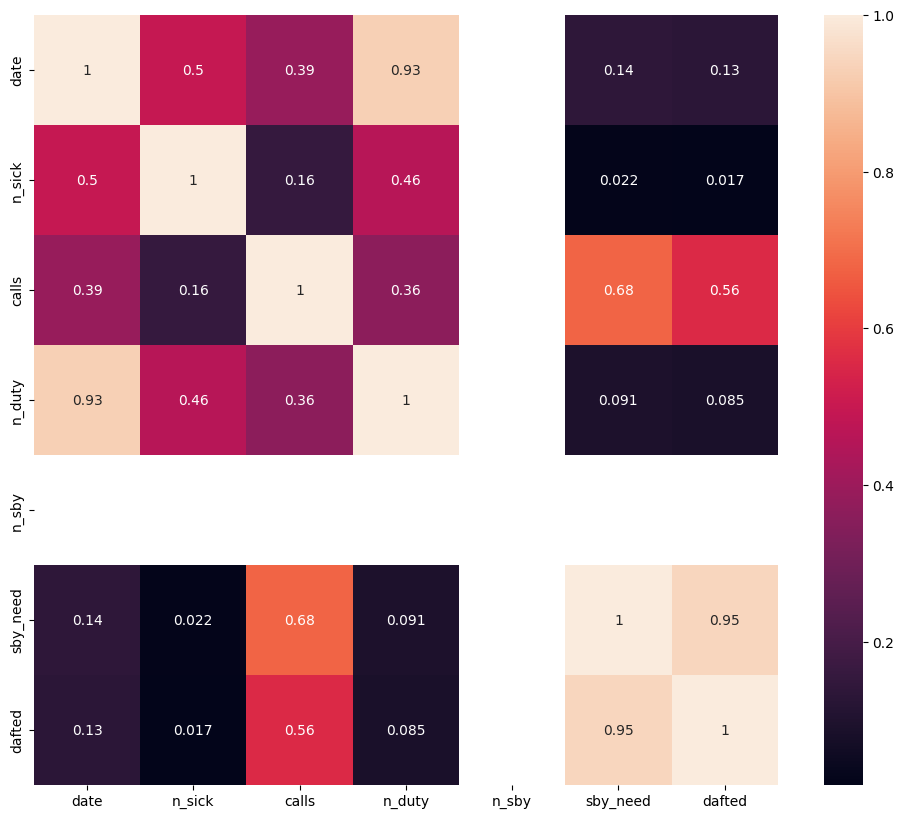

In [86]:
plt.figure(figsize= (12, 10))

sns.heatmap(sickness_data.corr(), annot = True)

Feature Engineering

In [87]:
# Extract year, month, day, and day of the week
sickness_data['year'] = sickness_data['date'].dt.year
sickness_data['month'] = sickness_data['date'].dt.month
sickness_data['day'] = sickness_data['date'].dt.day
sickness_data['day_of_week'] = sickness_data['date'].dt.dayofweek

# Create a binary feature indicating if the day is a weekend
sickness_data['is_weekend'] = sickness_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Extract quarter
sickness_data['quarter'] = sickness_data['date'].dt.quarter

In [88]:
# Create lagged features for 'n_sick' and 'calls' for 1 day and 2 days
sickness_data['n_sick_lag1'] = sickness_data['n_sick'].shift(1)
sickness_data['n_sick_lag2'] = sickness_data['n_sick'].shift(2)
sickness_data['calls_lag1'] = sickness_data['calls'].shift(1)
sickness_data['calls_lag2'] = sickness_data['calls'].shift(2)


In [89]:
# Create rolling mean and standard deviation for 'n_sick' and 'calls' over a 7-day window
sickness_data['n_sick_roll_mean'] = sickness_data['n_sick'].rolling(window=7).mean()
sickness_data['n_sick_roll_std'] = sickness_data['n_sick'].rolling(window=7).std()
sickness_data['calls_roll_mean'] = sickness_data['calls'].rolling(window=7).mean()
sickness_data['calls_roll_std'] = sickness_data['calls'].rolling(window=7).std()


In [90]:
# Calculate day-to-day difference for 'n_sick' and 'calls'
sickness_data['n_sick_diff'] = sickness_data['n_sick'].diff()
sickness_data['calls_diff'] = sickness_data['calls'].diff()


In [91]:
# Sick to Available Ratio: Ratio of drivers who called in sick to the total number of drivers available
sickness_data['sick_to_available_ratio'] = sickness_data['n_sick'] / (sickness_data['n_duty'] + sickness_data['n_sby'])

# Emergency Call to Driver Ratio: Ratio of emergency calls to the total number of drivers (both on duty and standby)
sickness_data['calls_to_driver_ratio'] = sickness_data['calls'] / (sickness_data['n_duty'] + sickness_data['n_sby'])


In [92]:
# Interaction between the number of drivers who called in sick and the number of emergency calls
sickness_data['sick_calls_interaction'] = sickness_data['n_sick'] * sickness_data['calls']

# Interaction between the number of emergency calls and available drivers (both on duty and standby)
sickness_data['calls_driver_interaction'] = sickness_data['calls'] * (sickness_data['n_duty'] + sickness_data['n_sby'])


In [93]:
pd.set_option('display.max_columns', 30)

sickness_data.head(20)

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,year,month,day,day_of_week,is_weekend,quarter,n_sick_lag1,n_sick_lag2,calls_lag1,calls_lag2,n_sick_roll_mean,n_sick_roll_std,calls_roll_mean,calls_roll_std,n_sick_diff,calls_diff,sick_to_available_ratio,calls_to_driver_ratio,sick_calls_interaction,calls_driver_interaction
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,2016,4,1,4,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040782,4.555307,595242.0,14595660.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,2016,4,2,5,1,2,73.0,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,-9.0,372.0,0.035754,4.763128,545664.0,15261540.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,2016,4,3,6,1,2,64.0,73.0,8526.0,8154.0,NaN,NaN,NaN,NaN,4.0,-438.0,0.037989,4.518436,549984.0,14477520.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,2016,4,4,0,0,2,68.0,64.0,8088.0,8526.0,NaN,NaN,NaN,NaN,3.0,-1044.0,0.039665,3.935196,500124.0,12608760.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,2016,4,5,1,0,2,71.0,68.0,7044.0,8088.0,NaN,NaN,NaN,NaN,-8.0,192.0,0.035196,4.042458,455868.0,12952440.0
5,2016-04-06,70,6492.0,1700,90,0.0,0.0,2016,4,6,2,0,2,63.0,71.0,7236.0,7044.0,NaN,NaN,NaN,NaN,7.0,-744.0,0.039106,3.626816,454440.0,11620680.0
6,2016-04-07,64,6204.0,1700,90,0.0,0.0,2016,4,7,3,0,2,70.0,63.0,6492.0,7236.0,67.571429,3.952094,7392.000000,886.735586,-6.0,-288.0,0.035754,3.465922,397056.0,11105160.0
7,2016-04-08,62,7614.0,1700,90,0.0,0.0,2016,4,8,4,0,2,64.0,70.0,6204.0,6492.0,66.000000,3.605551,7314.857143,831.142071,-2.0,1410.0,0.034637,4.253631,472068.0,13629060.0
8,2016-04-09,51,5706.0,1700,90,0.0,0.0,2016,4,9,5,1,2,62.0,64.0,7614.0,6204.0,64.142857,6.768273,6912.000000,829.686688,-11.0,-1908.0,0.028492,3.187709,291006.0,10213740.0
9,2016-04-10,54,6606.0,1700,90,0.0,0.0,2016,4,10,6,1,2,51.0,62.0,5706.0,7614.0,62.142857,7.470577,6700.285714,648.996588,3.0,900.0,0.030168,3.690503,356724.0,11824740.0


In [94]:
sickness_data.shape

(1152, 27)

Handling Missing Values

In [95]:
# Columns for which to apply forward fill and then backward fill
columns_to_ffill = [
    'n_sick_lag1', 'n_sick_lag2', 'calls_lag1', 'calls_lag2', 
    'n_sick_diff', 'calls_diff'
]

# Apply both forward fill and backward fill for these columns
for column in columns_to_ffill:
    sickness_data[column] = sickness_data[column].ffill().bfill()
    

# Columns for which to apply backward fill
rolling_columns_to_bfill = [
    'n_sick_roll_mean', 'n_sick_roll_std', 'calls_roll_mean', 'calls_roll_std'
]

# Apply backward fill for these columns
for column in rolling_columns_to_bfill:
    sickness_data[column] = sickness_data[column].bfill()
    

# (Optional) Verify there are no more NaN values
nan_after_handling = sickness_data.isna().sum()
print(nan_after_handling)



date                        0
n_sick                      0
calls                       0
n_duty                      0
n_sby                       0
sby_need                    0
dafted                      0
year                        0
month                       0
day                         0
day_of_week                 0
is_weekend                  0
quarter                     0
n_sick_lag1                 0
n_sick_lag2                 0
calls_lag1                  0
calls_lag2                  0
n_sick_roll_mean            0
n_sick_roll_std             0
calls_roll_mean             0
calls_roll_std              0
n_sick_diff                 0
calls_diff                  0
sick_to_available_ratio     0
calls_to_driver_ratio       0
sick_calls_interaction      0
calls_driver_interaction    0
dtype: int64


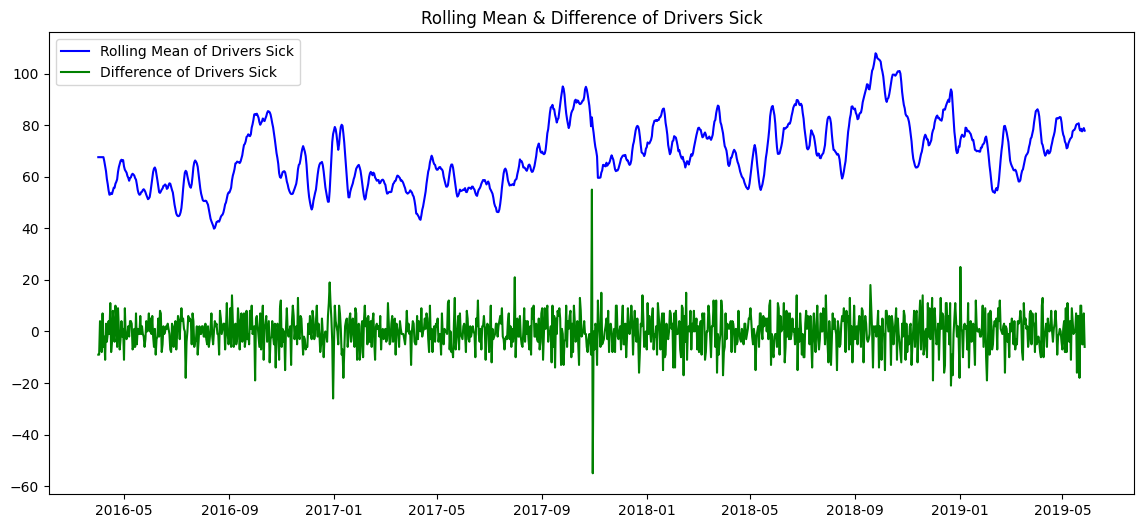

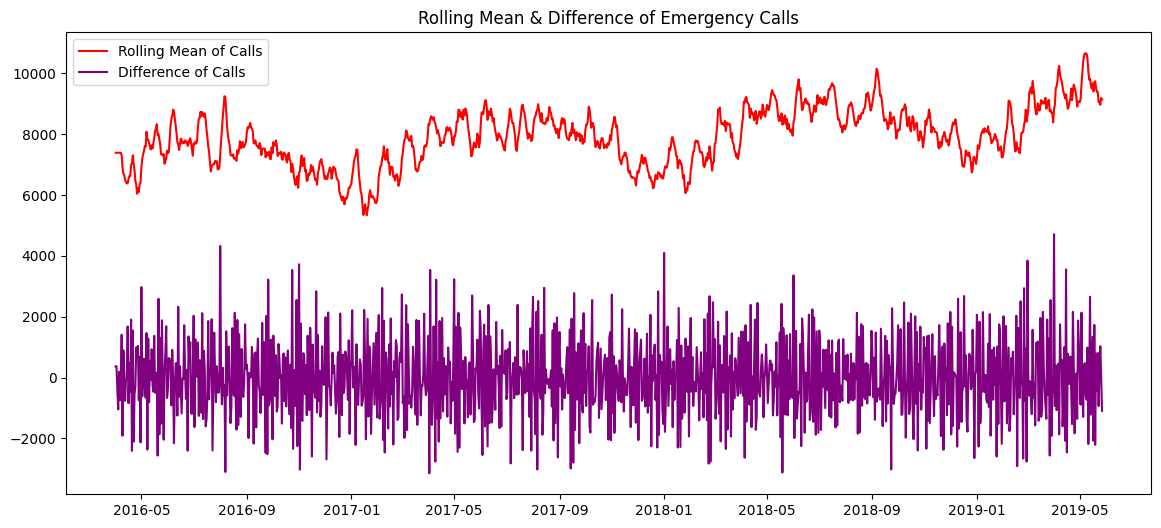

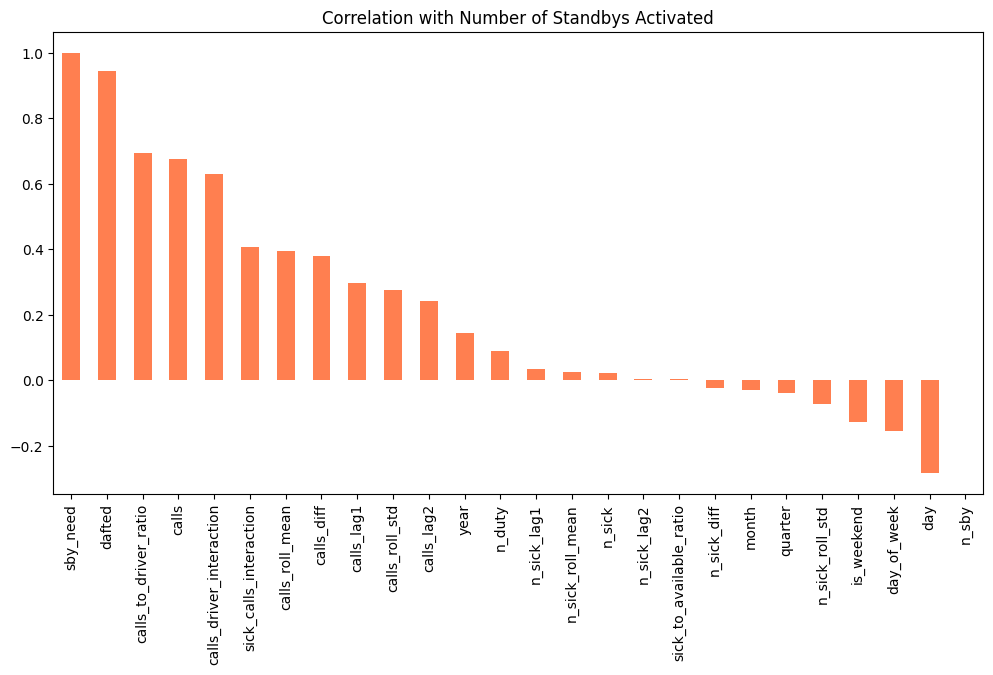

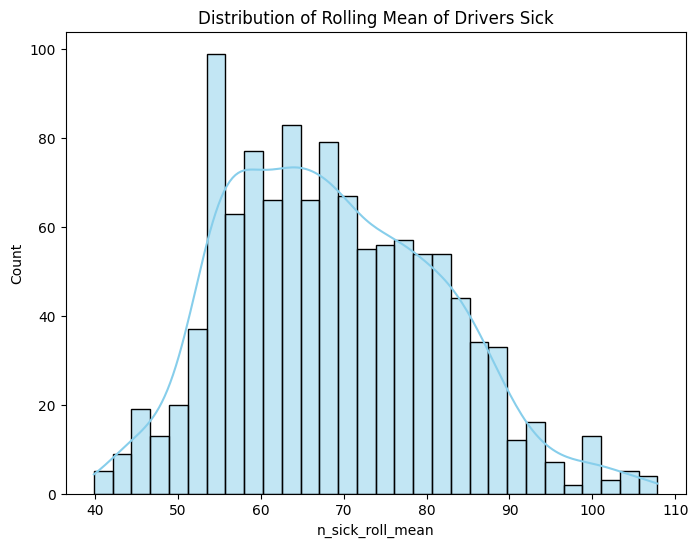

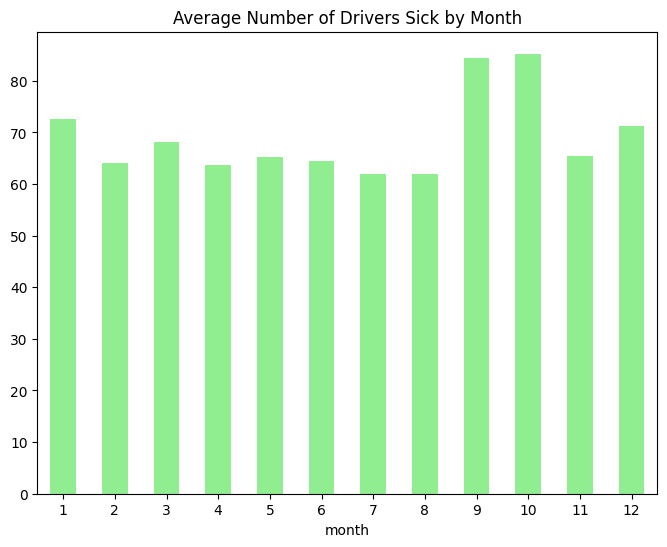

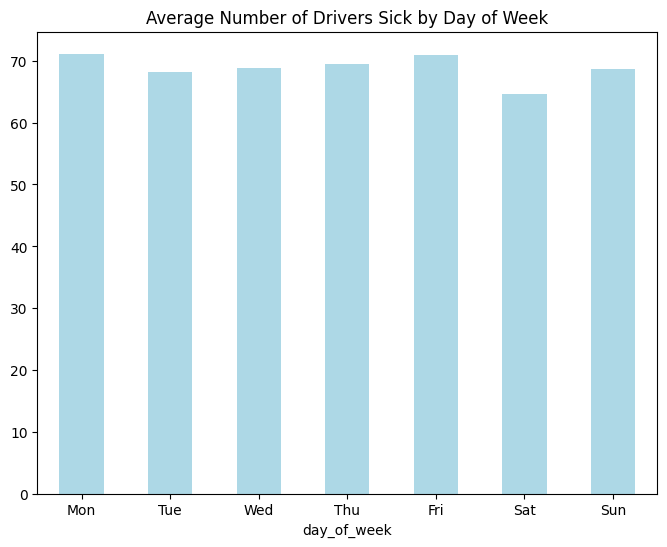

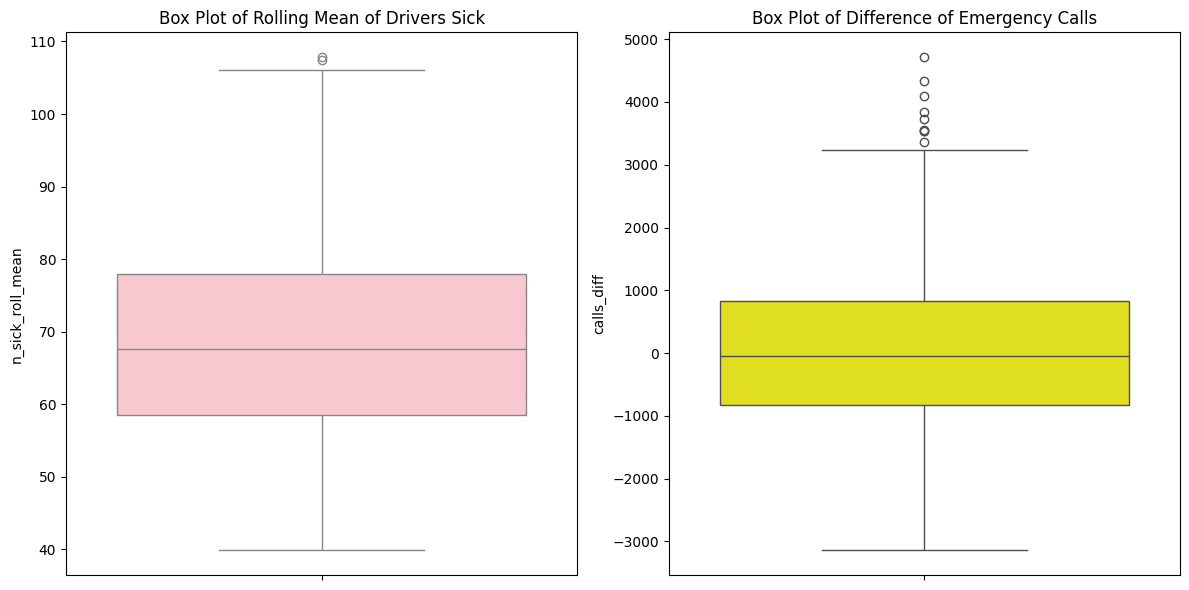

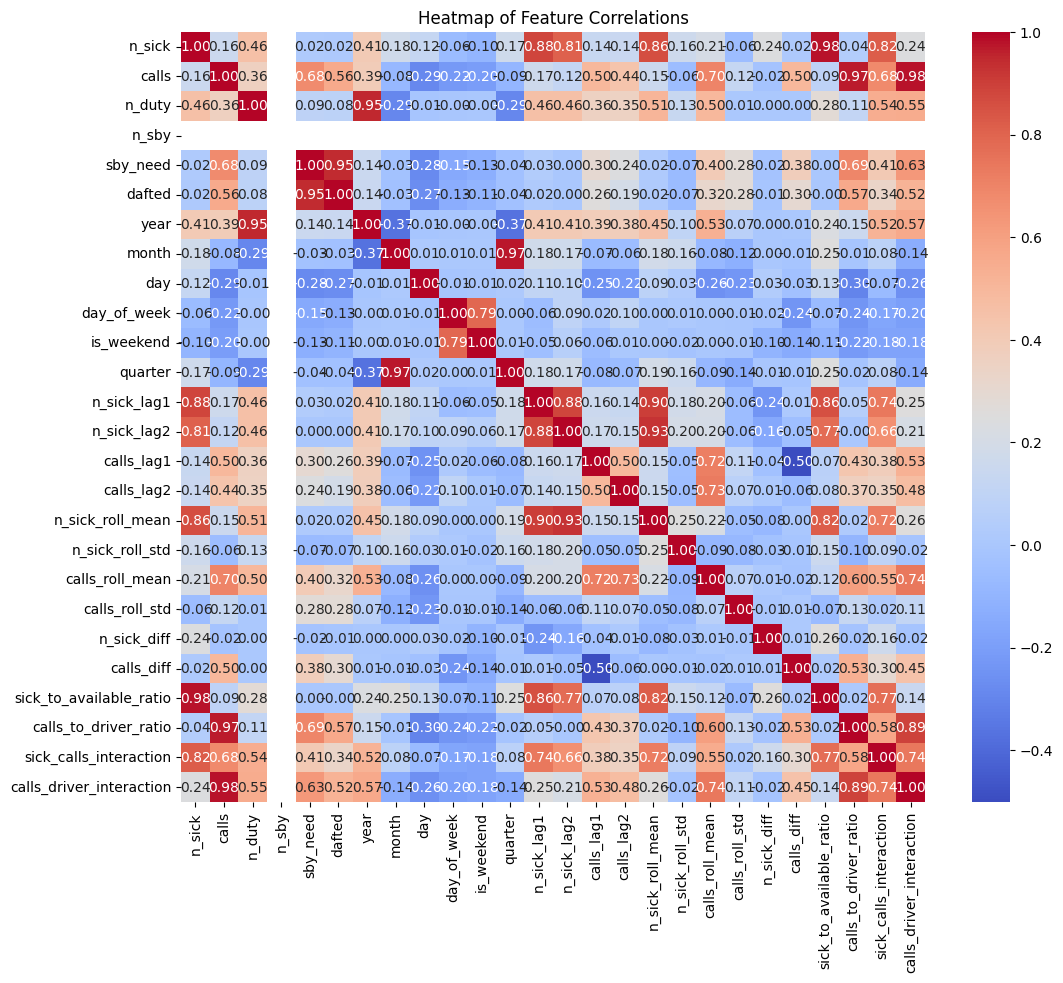

In [96]:
# 1. Temporal Visualization of New Features:
plt.figure(figsize=(14, 6))
plt.plot(sickness_data['date'], sickness_data['n_sick_roll_mean'], label='Rolling Mean of Drivers Sick', color='blue')
plt.plot(sickness_data['date'], sickness_data['n_sick_diff'], label='Difference of Drivers Sick', color='green')
plt.title('Rolling Mean & Difference of Drivers Sick')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(sickness_data['date'], sickness_data['calls_roll_mean'], label='Rolling Mean of Calls', color='red')
plt.plot(sickness_data['date'], sickness_data['calls_diff'], label='Difference of Calls', color='purple')
plt.title('Rolling Mean & Difference of Emergency Calls')
plt.legend()
plt.show()

# 2. Correlation Analysis:
correlations = sickness_data.drop(columns=['date']).corr()['sby_need'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar', color='coral')
plt.title('Correlation with Number of Standbys Activated')
plt.show()

# 3. Distribution Analysis:
plt.figure(figsize=(8, 6))
sns.histplot(sickness_data['n_sick_roll_mean'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Rolling Mean of Drivers Sick')
plt.show()

# 4. Seasonal Patterns:
plt.figure(figsize=(8, 6))
month_avg_sick = sickness_data.groupby('month')['n_sick'].mean()
month_avg_sick.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Drivers Sick by Month')
plt.xticks(ticks=range(12), labels=month_avg_sick.index, rotation=0)
plt.show()

# 5. Weekday vs. Weekend Analysis:
plt.figure(figsize=(8, 6))
weekday_avg_sick = sickness_data.groupby('day_of_week')['n_sick'].mean()
weekday_avg_sick.plot(kind='bar', color='lightblue')
plt.title('Average Number of Drivers Sick by Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

# 6. Box Plots:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=sickness_data, y='n_sick_roll_mean', color='pink')
plt.title('Box Plot of Rolling Mean of Drivers Sick')

plt.subplot(1, 2, 2)
sns.boxplot(data=sickness_data, y='calls_diff', color='yellow')
plt.title('Box Plot of Difference of Emergency Calls')
plt.tight_layout()
plt.show()

# 7. Heatmap of Correlations:
plt.figure(figsize=(12, 10))
correlation_matrix = sickness_data.drop(columns=['date']).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

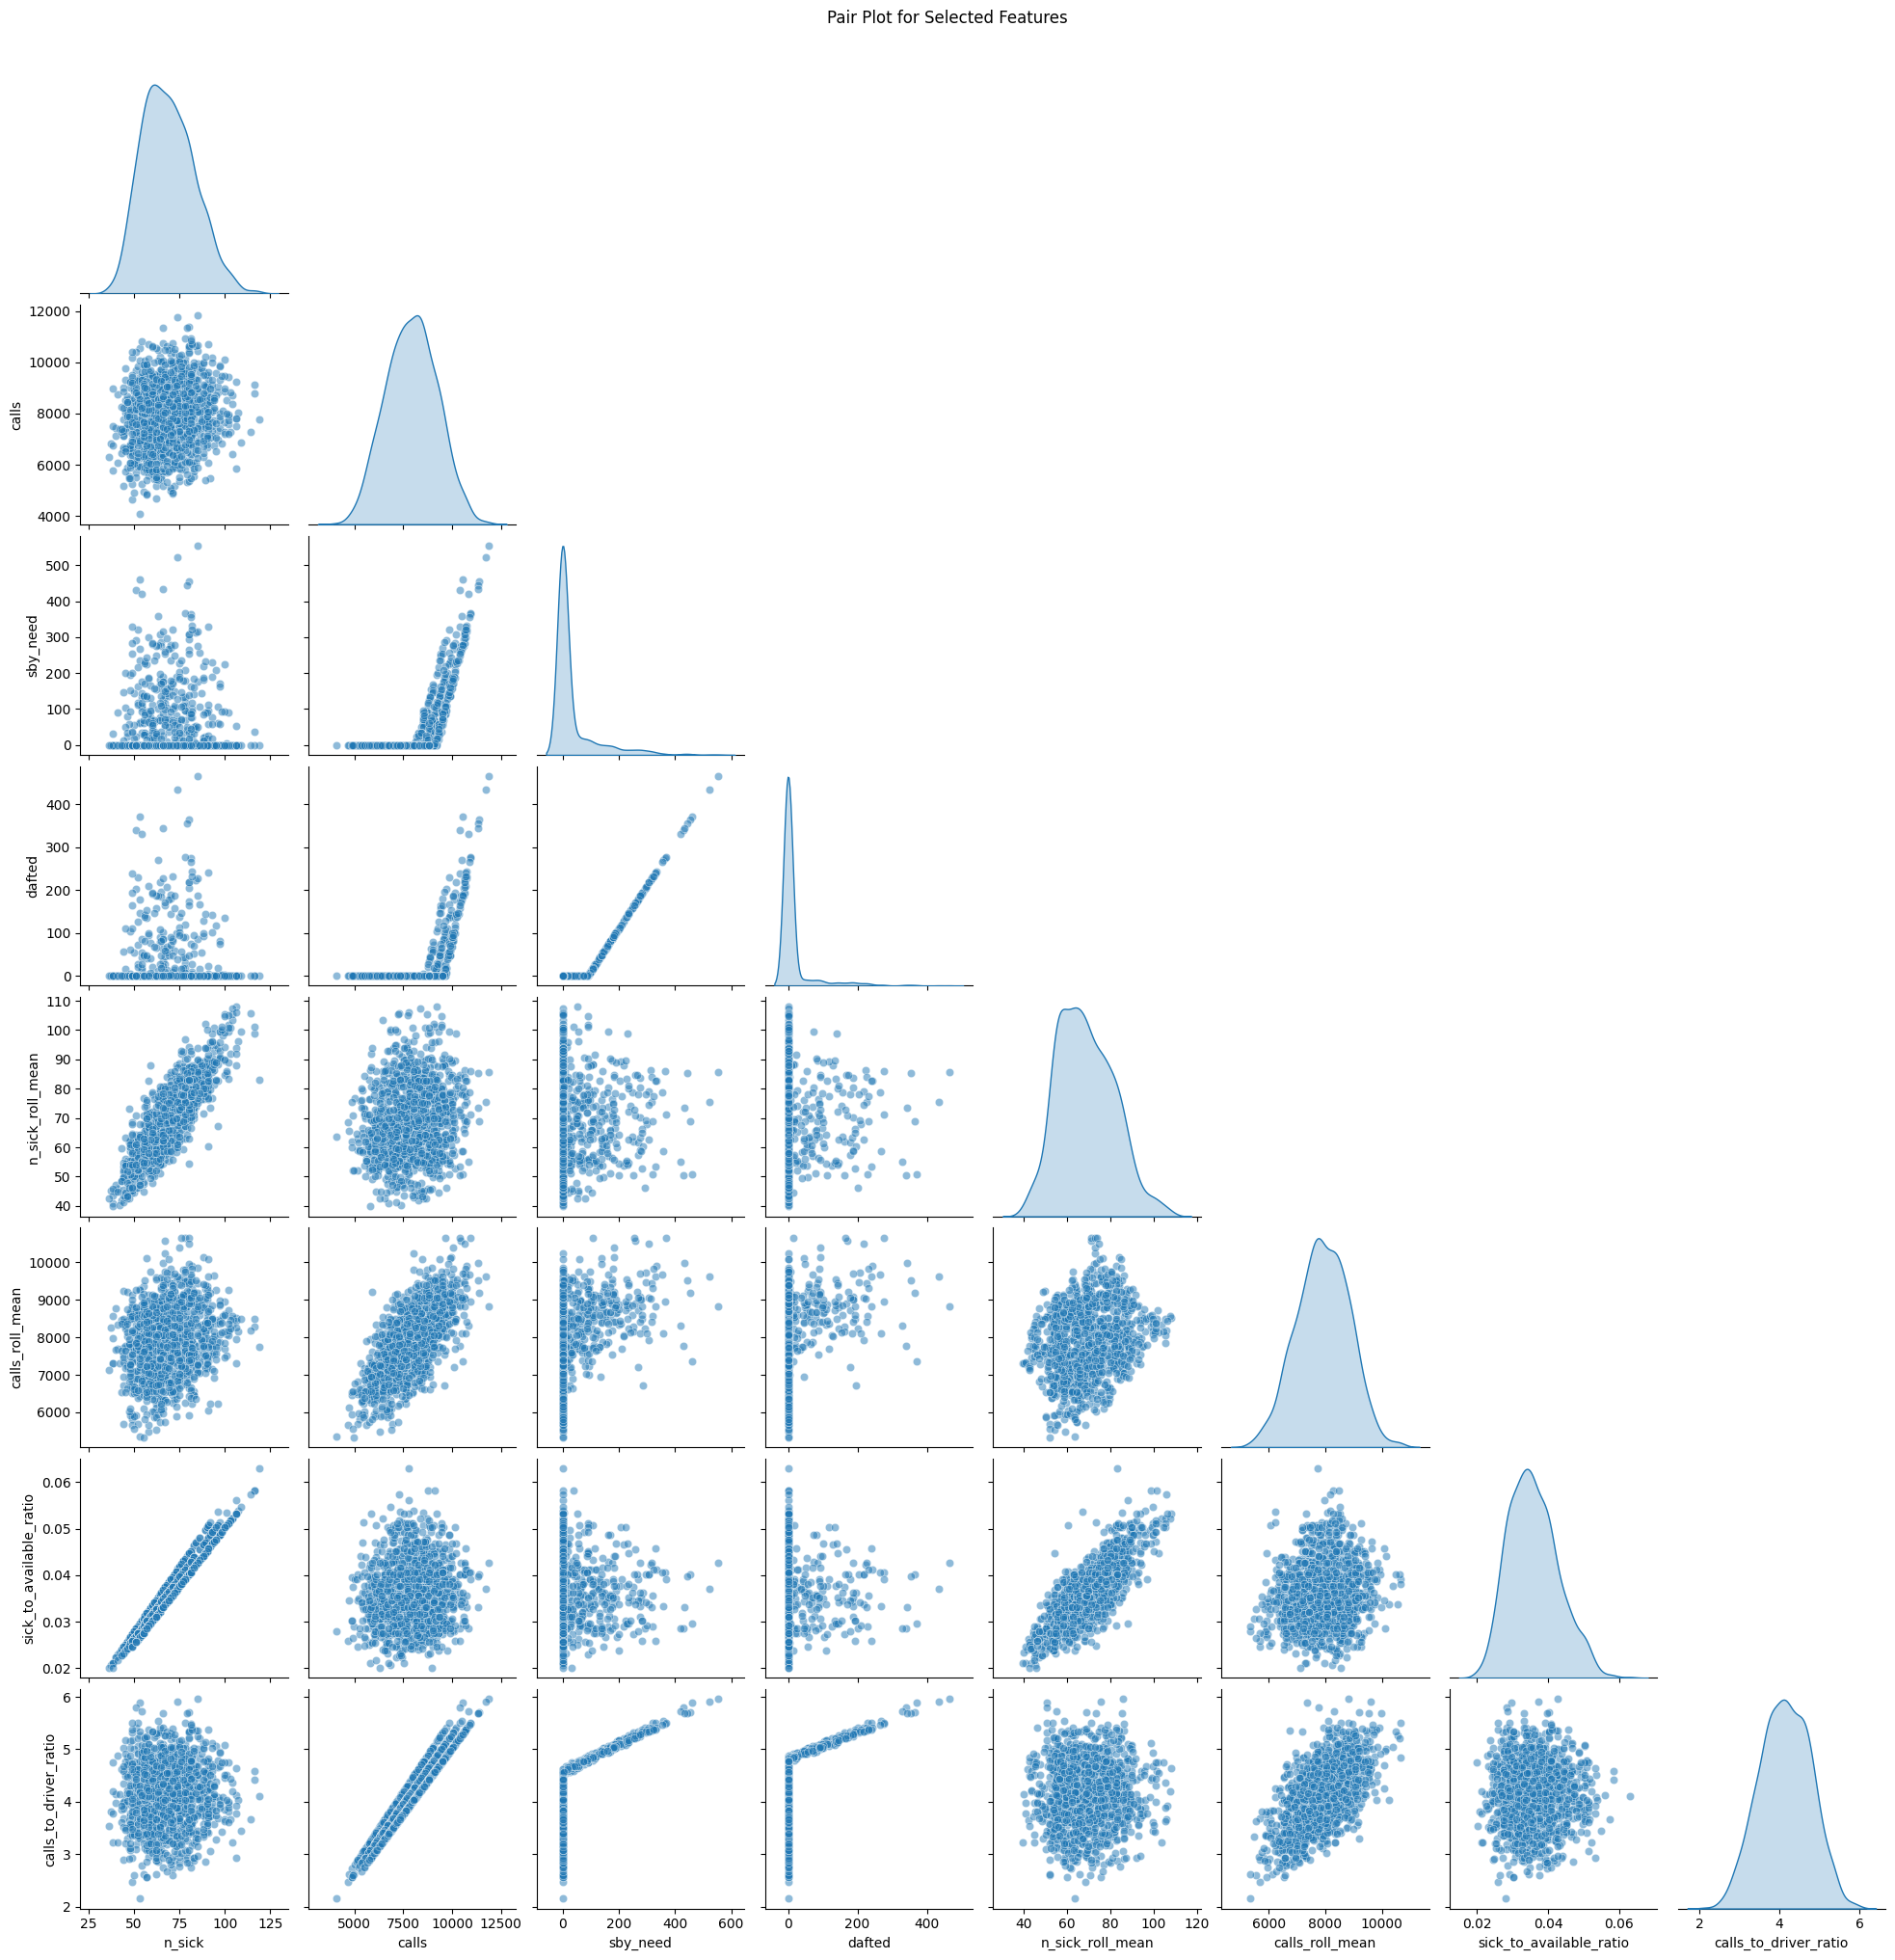

In [97]:
# Select relevant columns for pair plot
selected_columns = ['n_sick', 'calls', 'sby_need', 'dafted', 'n_sick_roll_mean', 
                    'calls_roll_mean', 'sick_to_available_ratio', 'calls_to_driver_ratio']

# Generate pair plot for selected columns
pairplot_data = sickness_data[selected_columns]
sns.pairplot(pairplot_data, corner=True, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()

In [98]:
# Define features and target variable
X = sickness_data.drop(columns=['date', 'sby_need'])
y = sickness_data['sby_need']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the baseline model (Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the training set
y_pred_train = baseline_model.predict(X_train)

# Evaluate the baseline model's performance on training data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)


# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Performance on Training Data:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 (Coefficient of Determination): {r2_train}")
print("\nPerformance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 (Coefficient of Determination): {r2}")


Performance on Training Data:
Mean Absolute Error (MAE): 16.86249271405271
Mean Squared Error (MSE): 445.7586201349591
Root Mean Squared Error (RMSE): 21.11299647456417
R^2 (Coefficient of Determination): 0.9359094318861493

Performance on Test Data:
Mean Absolute Error (MAE): 15.959891029202183
Mean Squared Error (MSE): 397.75521259023304
Root Mean Squared Error (RMSE): 19.943801357570553
R^2 (Coefficient of Determination): 0.8949557636782547


Gradient Boosting Machines

In [99]:

# Initialize the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the GBM model on the training data
gbm_model.fit(X_train, y_train)

# Predict on the training set
y_pred_train_gbm = gbm_model.predict(X_train)

# Evaluate the GBM model's performance on training data
mae_gbm_train = mean_absolute_error(y_train, y_pred_train_gbm)
mse_gbm_train = mean_squared_error(y_train, y_pred_train_gbm)
rmse_gbm_train = mean_squared_error(y_train, y_pred_train_gbm, squared=False)
r2_gbm_train = r2_score(y_train, y_pred_train_gbm)



# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the GBM model's performance
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)
r2_gbm = r2_score(y_test, y_pred_gbm)


print("Performance on Training Data:")
print(f"Mean Absolute Error (MAE): {mae_gbm_train}")
print(f"Mean Squared Error (MSE): {mse_gbm_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm_train}")
print(f"R^2 (Coefficient of Determination): {r2_gbm_train}")
print("\nPerformance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae_gbm}")
print(f"Mean Squared Error (MSE): {mse_gbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm}")
print(f"R^2 (Coefficient of Determination): {r2_gbm}")



Performance on Training Data:
Mean Absolute Error (MAE): 0.4979518677197901
Mean Squared Error (MSE): 1.2840423087438884
Root Mean Squared Error (RMSE): 1.1331559066359265
R^2 (Coefficient of Determination): 0.9998153821433118

Performance on Test Data:
Mean Absolute Error (MAE): 1.1516967679975911
Mean Squared Error (MSE): 11.82975794674722
Root Mean Squared Error (RMSE): 3.4394415166923857
R^2 (Coefficient of Determination): 0.9968758476317762


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Simplified and adjusted hyperparameters grid
simplified_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomizedSearchCV object with the simplified hyperparameters
simplified_random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), 
                                             param_distributions=simplified_param_grid, 
                                             n_iter=10,  # Reduced number of iterations
                                             scoring='neg_mean_squared_error', 
                                             n_jobs=-1, 
                                             cv=2,  # Reduced CV folds
                                             random_state=42, 
                                             error_score='raise')

# Fit to the training data
simplified_random_search.fit(X_train, y_train)

# Extract the best estimator after the search
best_gbm_simplified = simplified_random_search.best_estimator_
print(best_gbm_simplified)


GradientBoostingRegressor(max_depth=2, max_features='sqrt', random_state=42,
                          subsample=0.8)


In [102]:

# Predict on the training data using the best GBM model
y_train_pred = best_gbm_simplified.predict(X_train)

# Evaluate the model's performance on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the test data using the best GBM model
y_test_pred = best_gbm_simplified.predict(X_test)

# Evaluate the model's performance on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print("Performance on Training Data:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 (Coefficient of Determination): {r2_train}")
print("\nPerformance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R^2 (Coefficient of Determination): {r2_test}")


Performance on Training Data:
Mean Absolute Error (MAE): 4.306941597889101
Mean Squared Error (MSE): 41.7662257175321
Root Mean Squared Error (RMSE): 6.462679453410335
R^2 (Coefficient of Determination): 0.9939949088737813

Performance on Test Data:
Mean Absolute Error (MAE): 5.613848985003764
Mean Squared Error (MSE): 119.29142931425552
Root Mean Squared Error (RMSE): 10.922061587184698
R^2 (Coefficient of Determination): 0.9684960078575897


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Prepare the data
X = sickness_data.drop(columns=['date', 'sby_need', 'n_sby', 'year', 'day', 'day_of_week'])
y = sickness_data['sby_need']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Checker: Number of days with insufficient standbys
insufficient_standby_predictions_lr = sum(y_pred_baseline > 90)
insufficient_standby_predictions_gbm = sum(y_pred_gb > 90)
actual_insufficient_standbys = sum(y_test > 90)

print(f"Linear Regression predicted {insufficient_standby_predictions_lr} days with insufficient standbys.")
print(f"GBM predicted {insufficient_standby_predictions_gbm} days with insufficient standbys.")
print(f"Actual number of days with insufficient standbys in the test set: {actual_insufficient_standbys}")


Linear Regression predicted 18 days with insufficient standbys.
GBM predicted 25 days with insufficient standbys.
Actual number of days with insufficient standbys in the test set: 25


In [114]:


# Prepare the data
X = sickness_data.drop(columns=['date', 'sby_need', 'n_sby', 'year', 'day', 'day_of_week'])
y = sickness_data['sby_need']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_train_baseline = baseline_model.predict(X_train)
y_pred_test_baseline = baseline_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_train_gbm = gb_model.predict(X_train)
y_pred_test_gbm = gb_model.predict(X_test)

# Results
results = {
    "Model": ["Linear Regression", "GBM"],
    "Train MSE": [mean_squared_error(y_train, y_pred_train_baseline), mean_squared_error(y_train, y_pred_train_gbm)],
    "Test MSE": [mean_squared_error(y_test, y_pred_test_baseline), mean_squared_error(y_test, y_pred_test_gbm)],
    "Train MAE": [mean_absolute_error(y_train, y_pred_train_baseline), mean_absolute_error(y_train, y_pred_train_gbm)],
    "Test MAE": [mean_absolute_error(y_test, y_pred_test_baseline), mean_absolute_error(y_test, y_pred_test_gbm)],
    "Train R2": [r2_score(y_train, y_pred_train_baseline), r2_score(y_train, y_pred_train_gbm)],
    "Test R2": [r2_score(y_test, y_pred_test_baseline), r2_score(y_test, y_pred_test_gbm)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Checker: Number of days with insufficient standbys
insufficient_standby_predictions_lr = sum(y_pred_test_baseline > 90)
insufficient_standby_predictions_gbm = sum(y_pred_test_gbm > 90)
actual_insufficient_standbys = sum(y_test > 90)

print(f"\nLinear Regression predicted {insufficient_standby_predictions_lr} days with insufficient standbys.")
print(f"GBM predicted {insufficient_standby_predictions_gbm} days with insufficient standbys.")
print(f"Actual number of days with insufficient standbys in the test set: {actual_insufficient_standbys}")


               Model   Train MSE    Test MSE  Train MAE   Test MAE  Train R2  \
0  Linear Regression  446.939176  395.494952  16.873758  15.984206  0.935740   
1                GBM    1.416248   11.833433   0.517295   1.162887  0.999796   

    Test R2  
0  0.895553  
1  0.996875  

Linear Regression predicted 18 days with insufficient standbys.
GBM predicted 25 days with insufficient standbys.
Actual number of days with insufficient standbys in the test set: 25


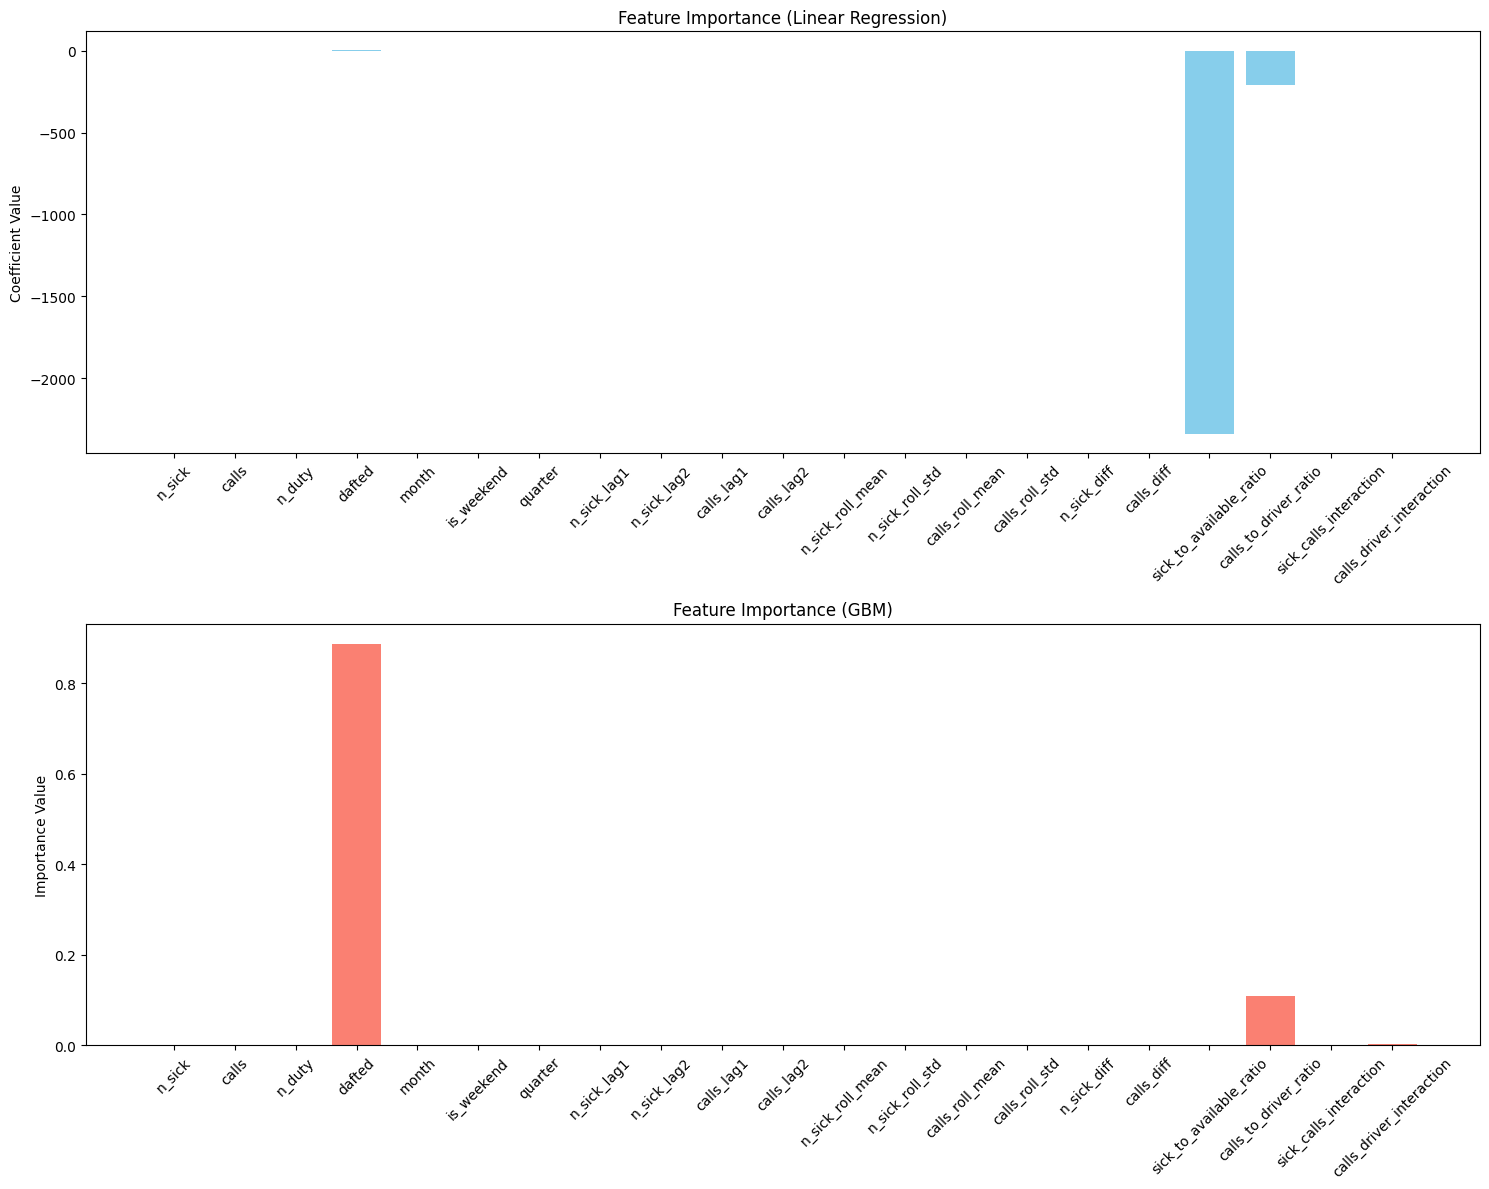

In [115]:
import matplotlib.pyplot as plt

# Compute feature importance
# For Linear Regression: Coefficients as feature importance
lr_importance = baseline_model.coef_

# For Gradient Boosting Machines: Feature importance attribute
gbm_importance = gb_model.feature_importances_

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Plotting feature importance for Linear Regression
ax[0].bar(X.columns, lr_importance, color='skyblue')
ax[0].set_title('Feature Importance (Linear Regression)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Coefficient Value')

# Plotting feature importance for GBM
ax[1].bar(X.columns, gbm_importance, color='salmon')
ax[1].set_title('Feature Importance (GBM)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylabel('Importance Value')

plt.tight_layout()
plt.show()


In [117]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Determine the top 3 most important features for GBM based on feature importance
top_n = 3
sorted_idx = gbm_importance.argsort()[-top_n:]

# Generate and visualize the partial dependence plots for these features
fig, ax = plt.subplots(figsize=(14, 8))
plot_partial_dependence(gb_model, X_train, features=sorted_idx, ax=ax, grid_resolution=50)
plt.suptitle('Partial Dependence Plots for Top 3 Features')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\s9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\__init__.py)

Error Analysis

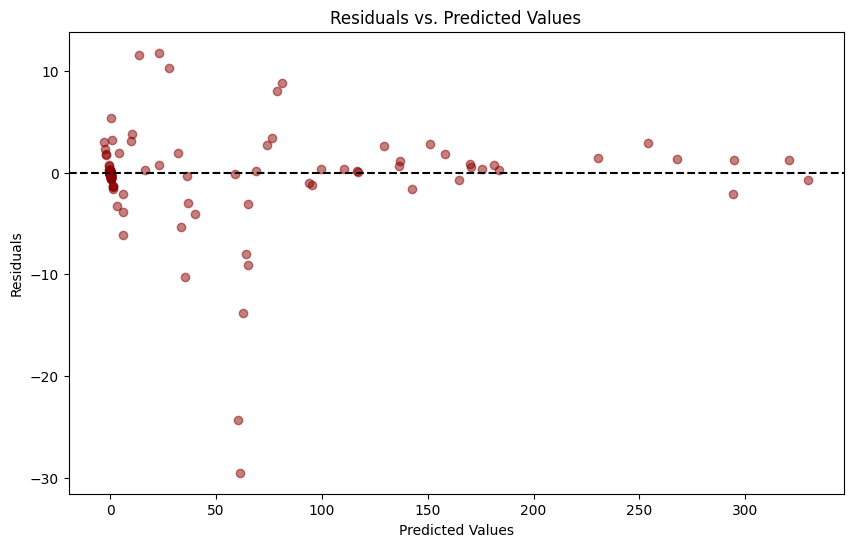

In [118]:
import numpy as np

# Calculate residuals for the GBM model
residuals = y_test - y_pred_gb

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals, alpha=0.5, color='darkred')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


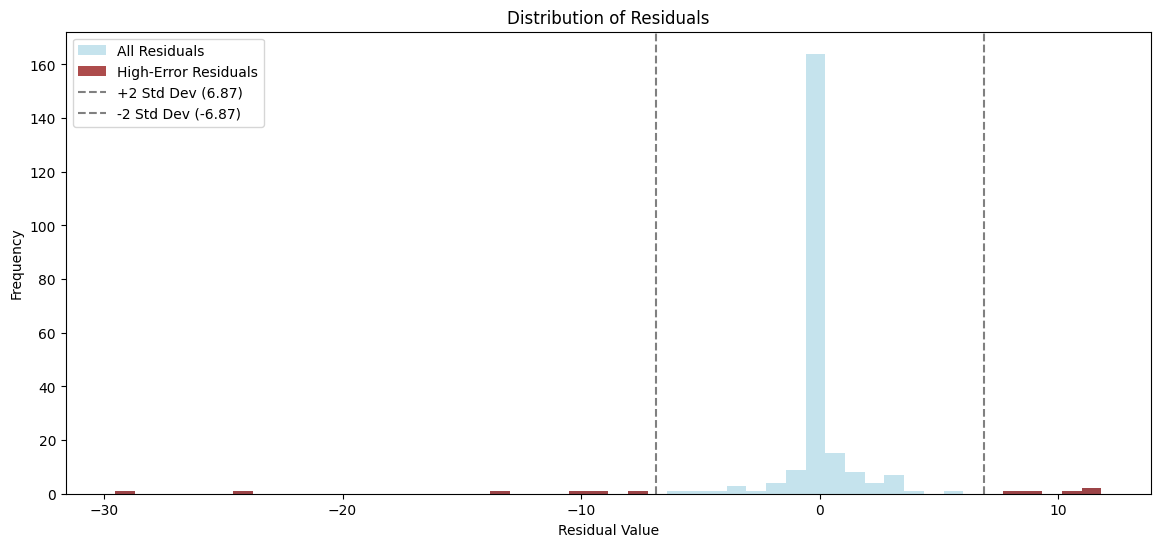

      n_sick   calls  n_duty  dafted  month  is_weekend  quarter  n_sick_lag1  \
174       77  8286.0    1700     0.0      9           0        3         80.0   
827       72  9420.0    1900     0.0      7           1        3         71.0   
1099      67  9444.0    1900     0.0      4           0        2         75.0   
1139      81  9528.0    1900     0.0      5           0        2         81.0   
771       49  9432.0    1900     0.0      5           1        2         55.0   

      n_sick_lag2  calls_lag1  calls_lag2  n_sick_roll_mean  n_sick_roll_std  \
174          72.0      8532.0      7362.0         75.714286         3.817254   
827          63.0      9462.0      8544.0         71.000000         7.831560   
1099         79.0     10260.0     11328.0         80.000000         7.416198   
1139         82.0      9480.0     10698.0         78.142857         4.525062   
771          53.0      8268.0      8562.0         58.142857         9.026416   

      calls_roll_mean  calls_rol

C:\Users\s9\AppData\Local\Temp\ipykernel_3356\2975307231.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_error_data['Residual'] = residuals.iloc[high_error_indices].values


In [122]:


# Calculate residuals for the GBM model
residuals = y_test - y_pred_gb

# Determine the threshold for high errors
threshold = 2 * np.std(residuals)
high_error_indices = np.where(np.abs(residuals) > threshold)[0]

# Extract high error data from the test set
high_error_data = X_test.iloc[high_error_indices]

# Visualize the distribution of residuals and highlight the high-error instances
plt.figure(figsize=(14, 6))
plt.hist(residuals, bins=50, color='lightblue', label='All Residuals', alpha=0.7)
plt.hist(residuals.iloc[high_error_indices], bins=50, color='darkred', label='High-Error Residuals', alpha=0.7)
plt.axvline(x=threshold, color='grey', linestyle='--', label=f'+2 Std Dev ({threshold:.2f})')
plt.axvline(x=-threshold, color='grey', linestyle='--', label=f'-2 Std Dev (-{threshold:.2f})')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# To inspect the high-error data, you can further examine the `high_error_data` DataFrame.
# For a more detailed view, add the residuals to this data:
high_error_data['Residual'] = residuals.iloc[high_error_indices].values

# Display the first few rows of the high-error data for inspection
print(high_error_data.head())


In [120]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(gb_model)

# Compute SHAP values for a sample of the test data
sample_data = X_test.sample(100, random_state=42)  # taking a sample for faster computation
shap_values = explainer.shap_values(sample_data)

# Plot the SHAP values for the sample
shap.summary_plot(shap_values, sample_data)


ModuleNotFoundError: No module named 'shap'